# Import all the Dependencies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [47]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Building and Compiling the Model

In [44]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Cotton Disease\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Cotton Disease\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=100,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 1951 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
Epoch 1/100
61/61 [==============================] - 64s 1s/step - loss: 0.0999 - accuracy: 0.9621 - val_loss: 0.5171 - val_accuracy: 0.8799
Epoch 2/100
61/61 [==============================] - 25s 413ms/step - loss: 0.1066 - accuracy: 0.9631 - val_loss: 0.5723 - val_accuracy: 0.8753
Epoch 3/100
61/61 [==============================] - 24s 389ms/step - loss: 0.1077 - accuracy: 0.9626 - val_loss: 0.5808 - val_accuracy: 0.8684
Epoch 4/100
61/61 [==============================] - 25s 418ms/step - loss: 0.1192 - accuracy: 0.9564 - val_loss: 0.5514 - val_accuracy: 0.8776
Epoch 5/100
61/61 [==============================] - 41s 677ms/step - loss: 0.1014 - accuracy: 0.9626 - val_loss: 0.5216 - val_accuracy: 0.8822
Epoch 6/100
61/61 [==============================] - 22s 359ms/step - loss: 0.1148 - accuracy: 0.9549 - val_loss: 0.4889 - val_accuracy: 0.8730
Epoch 7/100
61/61 [==============================] - 22s

61/61 [==============================] - 23s 377ms/step - loss: 0.1387 - accuracy: 0.9472 - val_loss: 0.6407 - val_accuracy: 0.8476
Epoch 58/100
61/61 [==============================] - 24s 394ms/step - loss: 0.1121 - accuracy: 0.9549 - val_loss: 0.5692 - val_accuracy: 0.8822
Epoch 59/100
61/61 [==============================] - 25s 417ms/step - loss: 0.1031 - accuracy: 0.9610 - val_loss: 0.5824 - val_accuracy: 0.8822
Epoch 60/100
61/61 [==============================] - 24s 388ms/step - loss: 0.1130 - accuracy: 0.9569 - val_loss: 0.5452 - val_accuracy: 0.8776
Epoch 61/100
61/61 [==============================] - 25s 407ms/step - loss: 0.0982 - accuracy: 0.9657 - val_loss: 0.6226 - val_accuracy: 0.8661
Epoch 62/100
61/61 [==============================] - 24s 399ms/step - loss: 0.0930 - accuracy: 0.9682 - val_loss: 0.5432 - val_accuracy: 0.8730
Epoch 63/100
61/61 [==============================] - 23s 371ms/step - loss: 0.0855 - accuracy: 0.9641 - val_loss: 0.5321 - val_accuracy: 0.882

In [52]:
scores = CNN_Classifier.evaluate(training_set)

61/61 [==============================] - 19s 310ms/step - loss: 0.0797 - accuracy: 0.9687


# Saving the Model

In [42]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\cotton_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\cotton_model.h5')

In [43]:
scores

[0.4985823631286621, 0.898383378982544]

# Plotting

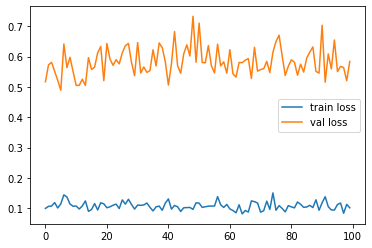

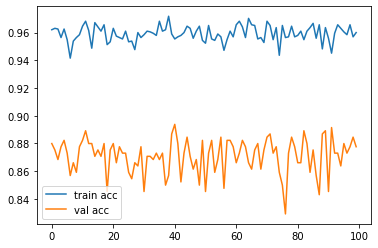

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [48]:
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [49]:
class_names = list(training_set.class_indices.keys())
class_names

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [50]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.6131404  0.686931   0.49616697]
  [0.6131404  0.686931   0.49616697]
  [0.6131404  0.686931   0.49616697]
  ...
  [0.7361475  0.8640923  0.6254303 ]
  [0.7361475  0.8640923  0.6254303 ]
  [0.7361475  0.8640923  0.6254303 ]]

 [[0.7303792  0.82841843 0.6127322 ]
  [0.7303792  0.82841843 0.6127322 ]
  [0.7303792  0.82841843 0.6127322 ]
  ...
  [0.7828748  0.8879042  0.6337408 ]
  [0.7828748  0.8879042  0.6337408 ]
  [0.7828748  0.8879042  0.6337408 ]]

 [[0.70339304 0.7740563  0.57662064]
  [0.70339304 0.7740563  0.57662064]
  [0.70339304 0.7740563  0.57662064]
  ...
  [0.81128734 0.9154101  0.6474613 ]
  [0.81128734 0.9154101  0.6474613 ]
  [0.81128734 0.9154101  0.6474613 ]]

 ...

 [[0.5309736  0.59268886 0.38874003]
  [0.5309736  0.59268886 0.38874003]
  [0.5309736  0.59268886 0.38874003]
  ...
  [0.5232532  0.46050814 0.397763  ]
  [0.5232532  0.46050814 0.397763  ]
  [0.5232532  0.46050814 0.397763  ]]

 [[0.30743575 0.29893035 0.25101855]
  [0.30743575 0.29893035 0.25101855]


# Run prediction on a sample image

first image to predict
actual label: diseased cotton plant
1/1 [==============================] - 1s 1s/step
predicted label: diseased cotton plant


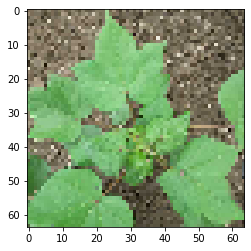

In [51]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break